<a href="https://colab.research.google.com/github/shizoda/education/blob/main/sound/sound_recording.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_sampling_quantization(
    bits=8,  # デフォルトを8ビットに変更
    num_samples=25,
    fig_width=12,
    fig_height=6,
    font_size=14,
    value_font_size=10,  # ★整数値を表示するフォントサイズを追加
    line_width_wave=2.5,
    line_width_sample=2,
    bg_color='#E0E0E0',
    wave_color='darkslategray',
    sample_color='teal'
):
    """
    音声波形の標本化・量子化の図を描画する関数（整数値表示機能付き）

    Args:
        bits (int): 量子化ビット数 (デフォルト: 8)
        num_samples (int): 標本化(サンプリング)する点の数
        fig_width (int): 図全体の幅
        fig_height (int): 図全体の高さ
        font_size (int): 軸のフォントサイズ
        value_font_size (int): ★標本化された整数値を表示するフォントサイズ
        line_width_wave (float): 元の波形の線の太さ
        line_width_sample (float): 標本化の線の太さ
        bg_color (str): 量子化範囲を示す背景色
        wave_color (str): 元の波形の色
        sample_color (str): 標本化の線の色
    """

    # --- 1. ビット数から量子化の最大・最小値を計算 ---
    max_val = 2**(bits - 1) - 1
    min_val = -2**(bits - 1)

    # --- 2. 描画データ（アナログ波形）の生成 ---
    x_wave = np.linspace(0, 4 * np.pi, 1000)
    y_wave_unscaled = (np.sin(x_wave) + 0.5 * np.sin(2.2 * x_wave + 1.5))
    scale_factor = max_val * 0.85
    y_wave = scale_factor * y_wave_unscaled / np.max(np.abs(y_wave_unscaled))

    # --- 3. 標本化（サンプリング）データの生成 ---
    x_samples = np.linspace(x_wave[0] + 0.1, x_wave[-1] * 0.95, num_samples)
    y_samples = np.interp(x_samples, x_wave, y_wave)

    # --- 4. 描画処理 ---
    plt.rcParams.update({'font.size': font_size})
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # --- 軸の設定 (原点(0,0)で交差) ---
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_linewidth(line_width_wave / 2)
    ax.spines['bottom'].set_linewidth(line_width_wave / 2)

    # --- 量子化範囲の背景を描画 ---
    ax.axhspan(min_val, max_val, color=bg_color, alpha=0.8, zorder=0)

    # --- アナログ波形を描画 ---
    ax.plot(x_wave, y_wave, color=wave_color, linewidth=line_width_wave, zorder=10)

    # --- 標本化(サンプリング)の縦線を描画 ---
    (markerline, stemlines, baseline) = ax.stem(
        x_samples,
        y_samples,
        linefmt=sample_color,
        markerfmt=' ',
        basefmt=' '
    )
    plt.setp(stemlines, 'linewidth', line_width_sample, 'zorder', 5)

    # --- 5. ★標本化された整数値を表示 ---
    # 値表示用のオフセットをデータ座標系で計算 (Y軸全体の2%をマージンとする)
    y_range = max_val - min_val
    y_offset = y_range * 0.02

    for x, y in zip(x_samples, y_samples):
        value = int(round(y))  # 量子化された整数値

        if y >= 0:
            va = 'bottom'  # 垂直位置：テキストの下端を基準
            text_y = y + y_offset # 点の「少し上」
        else:
            va = 'top'     # 垂直位置：テキストの上端を基準
            text_y = y - y_offset # 点の「下」

        ax.text(
            x,
            text_y,
            f'{value}',
            ha='center',
            va=va,
            fontsize=value_font_size, # ← 新しい引数を使用
            color=sample_color,
            zorder=11
        )

    # --- 目盛りの設定 ---
    ax.set_yticks([min_val, 0, max_val])
    # 8ビットならカンマは不要かもしれませんが、16ビットでも使えるように残しておきます
    formatter = ticker.FuncFormatter(lambda x, p: f'{int(x):,}')
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks([])

    # --- 軸の範囲と矢印の設定 ---
    ax.set_xlim(left=-0.1, right=4 * np.pi)
    ax.set_ylim(bottom=min_val * 1.25, top=max_val * 1.25) # 値表示のため少しマージンを広げる

    arrow_size = font_size * 0.8
    ax.plot(1, 0, ">", markersize=arrow_size, color="black",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^", markersize=arrow_size, color="black",
            transform=ax.get_xaxis_transform(), clip_on=False)

    plt.tight_layout()
    plt.show()

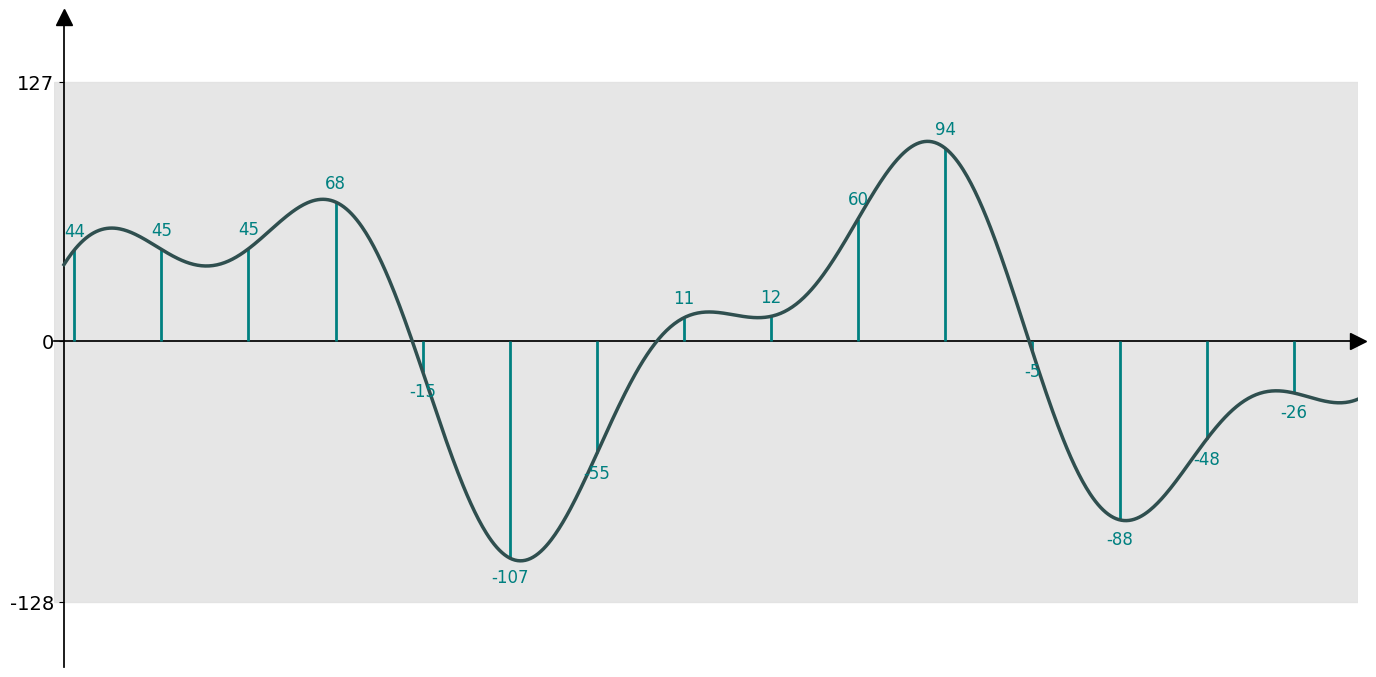

In [7]:
# --- 8ビット版（値の文字を大きく） ---
plot_sampling_quantization(
    bits=8,
    num_samples=15,       # サンプル数を減らして文字の重なりを回避
    fig_width=14,
    fig_height=7,
    font_size=14,
    value_font_size=12,   # 文字を少し大きく
    line_width_wave=2.5,
    line_width_sample=2
)